In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from skimage import io, transform, img_as_float
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torchvision.datasets as dsets
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms, models # add models to the list
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision import models
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision.utils import make_grid
import time
import random
import csv

# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [43]:
SAMPLE_PATH = "data/images/256/final/001_aug1.bmp"
TXT_PATH = "data/images/256/final/001_aug1.txt"

In [44]:
img = io.imread(SAMPLE_PATH, as_gray=True)
img

array([[0.01960784, 0.        , 0.00784314, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75686275, 0.78431373, ..., 0.81568627, 0.81568627,
        0.81568627],
       [0.        , 0.78039216, 0.76470588, ..., 0.81960784, 0.81960784,
        0.81960784],
       ...,
       [0.        , 0.81568627, 0.81568627, ..., 0.81568627, 0.81568627,
        0.81568627],
       [0.        , 0.81568627, 0.81568627, ..., 0.81568627, 0.81568627,
        0.81568627],
       [0.        , 0.81568627, 0.81568627, ..., 0.81568627, 0.81568627,
        0.81568627]])

In [45]:
img.shape

(2400, 1935)

In [46]:
def merge(list1, list2): 
      
    merged_list = [tuple([int(float(list1[i])),int(float(list2[i]))]) for i in range(0, len(list1))] 
    return merged_list 

In [47]:
def extract_cordinate_from_cvs(path):
    with open(path) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        print(readCSV)
        x_cordinates = []
        y_cordinates = []
        index = 0
        for row in readCSV:
            print(row)
            if(index == 1):
                y_cords = row[21:40]
                x_cords = row[40:]
                print(y_cords)
                print(merge(x_cords, y_cords))
                cordinates = merge(x_cords, y_cords)
                break
            index +=1
    return cordinates

In [48]:
def extract_labels_from_txt(path):
    with open(path, "r") as f:
        # only first 19 are actual coords in dataset label files
        coords_raw = f.readlines()[:19]
        coords_raw = [tuple([int(float(s)) for s in t.split(",")]) for t in coords_raw]
        return coords_raw

In [49]:
extract_labels_from_txt(TXT_PATH)

[(-707, -868),
 (-1345, -901),
 (-1161, -1151),
 (-476, -1100),
 (-1247, -1526),
 (-1258, -1891),
 (-1205, -2072),
 (-1135, -2144),
 (-1177, -2124),
 (-566, -1677),
 (-1332, -1742),
 (-1322, -1736),
 (-1460, -1625),
 (-1441, -1885),
 (-1386, -1492),
 (-1254, -2182),
 (-816, -1378),
 (-1308, -1441),
 (-536, -1212)]

In [63]:
ORIG_IMAGE_X = -1935
ORIG_IMAGE_Y = -2400
PIXELS_PER_MM = 10
N_LANDMARKS = 19

In [64]:
def print_image(img,coords_raw):
    plt.rcParams["figure.figsize"] = [32,18]
    plt.style.use(['dark_background'])
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 1, 1)
    ax1.imshow(img, cmap="gray")
    # also plot resized image for later 
    orig_y, orig_x = img.shape[:2]
    SCALE = 15

    # for rescale, use same target for both x&y axis
    rescaled_img = transform.resize(img,(orig_y/SCALE,orig_y/SCALE))
    ax2.imshow(rescaled_img, cmap="gray")

    for c in coords_raw:
        # add patches to original image
        # could also just plt.scatter() but less control then
        ax1.add_patch(plt.Circle(c, 5, color='r')) 
        # and rescaled marks to resized images
        x,y = c
        x = int(x*(orig_y*1.0/orig_x)/SCALE)
        y = int(y/SCALE)
        print(x,y)
        ax2.add_patch(plt.Circle((x,y), 1, color='g')) 

    plt.show()

-58 -57
-111 -60
-96 -76
-39 -73
-103 -101
-104 -126
-99 -138
-93 -142
-97 -141
-46 -111
-110 -116
-109 -115
-120 -108
-119 -125
-114 -99
-103 -145
-67 -91
-108 -96
-44 -80


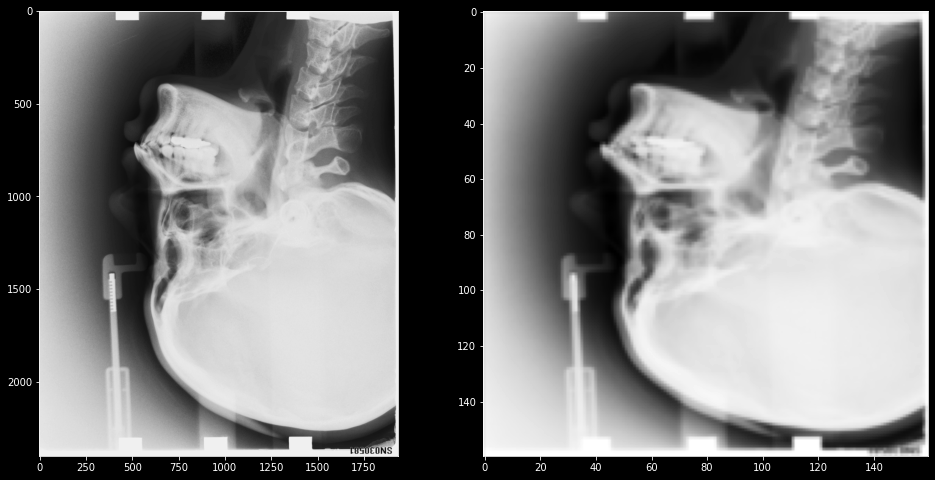

In [65]:
print_image(img, extract_labels_from_txt(TXT_PATH))